# **Setup and Dependencies**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#For mounting to drive
from google.colab import drive

#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=9dfef1b2ff42b8248427c3e6171ec4a5113bc2031e2d1484c2688212cc77f882
  Stored in directory: /tmp/pip-ephem-wheel-cache-cvpy9xks/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
#Mount folder to save and retrieve outputs 
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/siraj_homework"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/siraj_homework


# Import Data and Discovery 

In [0]:
df_full = pdr.get_data_yahoo("RELIANCE.NS", start="2018-01-01").reset_index()

df_full.to_csv('output/RELIANCE.NS.csv',index=False)

[*********************100%***********************]  1 of 1 downloaded


In [0]:
df_full.shape

(414, 7)

In [0]:
df_full.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,922.700012,922.700012,907.500000,909.750000,899.194580,4321686
1,2018-01-02,913.000000,919.549988,906.400024,911.150024,900.578369,4342815
2,2018-01-03,925.000000,926.000000,913.049988,914.799988,904.185974,6175312
3,2018-01-04,918.150024,921.799988,915.700012,920.299988,909.622131,4118581
4,2018-01-05,921.799988,926.900024,920.250000,923.250000,912.537903,3401905


In [0]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,414.000000,414.000000,414.000000,414.000000,414.000000,4.140000e+02
mean,1131.795895,1146.850000,1121.372705,1133.867995,1126.339913,8.446816e+06
std,162.757326,154.457757,149.936764,151.805193,153.358718,4.390492e+06
min,0.000000,895.849976,871.000000,882.700012,872.458435,1.283997e+06
25%,973.162506,983.324997,962.350006,971.737503,962.068985,5.738990e+06
50%,1134.875000,1150.649964,1127.150024,1137.100036,1130.837647,7.445839e+06
75%,1265.187500,1277.924988,1250.474976,1263.337494,1257.473938,1.010151e+07
max,1407.949951,1417.500000,1402.650024,1408.849976,1401.091064,4.792344e+07


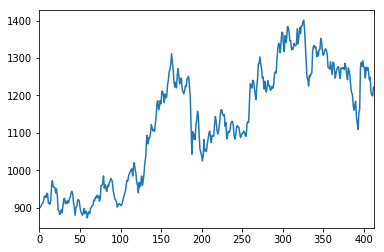

In [0]:
df_full["Adj Close"].plot()

# Data Preproccesing 

In [0]:
df_full.set_index("Date", inplace=True)

In [0]:
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,922.700012,922.700012,907.500000,909.750000,899.194580,4321686
2018-01-02,913.000000,919.549988,906.400024,911.150024,900.578369,4342815
2018-01-03,925.000000,926.000000,913.049988,914.799988,904.185974,6175312
2018-01-04,918.150024,921.799988,915.700012,920.299988,909.622131,4118581
2018-01-05,921.799988,926.900024,920.250000,923.250000,912.537903,3401905


In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)

data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past 
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
y


array([ 910.610535,  916.244446,  910.412842,  918.567139,  913.625183,
        923.410339,  927.808716,  939.471802,  943.474731,  937.396179,
        913.378052,  900.281738,  879.426636,  900.874878,  902.505676,
        919.506104,  921.038147,  918.27063 ,  901.220764,  889.607117,
        885.109924,  879.476013,  886.493652,  897.613159,  883.528442,
        890.644897,  889.359985,  872.458435,  882.589539,  889.112915,
        884.516907,  897.662537,  900.430054,  905.37207 ,  906.409851,
        920.049744,  917.924744,  927.956909,  926.177795,  933.29425 ,
        927.116821,  931.366882,  917.133972,  925.140015,  958.794922,
        959.239685,  964.033386,  984.740356,  952.12323 ,  961.414185,
        950.442932,  942.881714,  959.733887,  955.87915 ,  965.367798,
        969.766174,  977.772217,  975.152893,  967.591675,  945.056213,
        934.381531,  923.014954,  920.543945,  915.997375,  901.665588,
        905.223755,  910.116333,  909.721008,  906.805298,  905.

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [0]:
x_test.shape

(77, 32)

# Modeling

In [0]:
#Help Functions 
def get_performance (model_pred):
  #Function returns standard  performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
   plt.scatter(model_pred, y_test, color="gray")
   plt.plot(y_test, y_test, color='red', linewidth=2)
  
  

In [0]:
y

array([ 910.610535,  916.244446,  910.412842,  918.567139,  913.625183,
        923.410339,  927.808716,  939.471802,  943.474731,  937.396179,
        913.378052,  900.281738,  879.426636,  900.874878,  902.505676,
        919.506104,  921.038147,  918.27063 ,  901.220764,  889.607117,
        885.109924,  879.476013,  886.493652,  897.613159,  883.528442,
        890.644897,  889.359985,  872.458435,  882.589539,  889.112915,
        884.516907,  897.662537,  900.430054,  905.37207 ,  906.409851,
        920.049744,  917.924744,  927.956909,  926.177795,  933.29425 ,
        927.116821,  931.366882,  917.133972,  925.140015,  958.794922,
        959.239685,  964.033386,  984.740356,  952.12323 ,  961.414185,
        950.442932,  942.881714,  959.733887,  955.87915 ,  965.367798,
        969.766174,  977.772217,  975.152893,  967.591675,  945.056213,
        934.381531,  923.014954,  920.543945,  915.997375,  901.665588,
        905.223755,  910.116333,  909.721008,  906.805298,  905.

# Baseline

In [0]:
y_pred_lag=np.roll(y_test, 1)

In [0]:
get_performance(y_pred_lag)


Mean Absolute Error: 16.5883
Mean Squared Error: 591.6399
Root Mean Squared Error: 24.3236


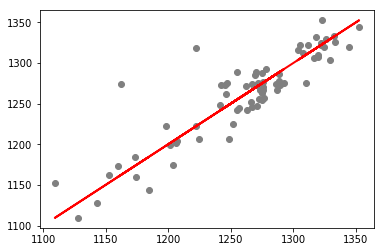

In [0]:
get_plot(y_pred_lag)

# Linear Regression

In [0]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [0]:
get_performance(y_pred_lr)

Mean Absolute Error: 16.4199
Mean Squared Error: 521.7492
Root Mean Squared Error: 22.8418


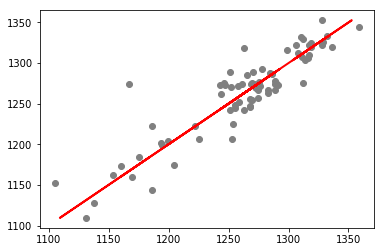

In [0]:
get_plot(y_pred_lr)

In [0]:
x


array([[ 899.19458 ,  900.578369,  904.185974, ...,  904.877808,
         922.817322,  924.794067],
       [ 900.578369,  904.185974,  909.622131, ...,  922.817322,
         924.794067,  910.610535],
       [ 904.185974,  909.622131,  912.537903, ...,  924.794067,
         910.610535,  916.244446],
       ...,
       [1254.900635, 1242.121338, 1273.447876, ..., 1248.550049,
        1206.400024, 1201.150024],
       [1242.121338, 1273.447876, 1266.536255, ..., 1206.400024,
        1201.150024, 1198.599976],
       [1273.447876, 1266.536255, 1252.165771, ..., 1201.150024,
        1198.599976, 1222.5     ]])

In [0]:
get_performance(y_pred_lr)

Mean Absolute Error: 16.4199
Mean Squared Error: 521.7492
Root Mean Squared Error: 22.8418


# Method #1-Ridge Regression

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [0]:
get_performance(y_pred_ridge)

Mean Absolute Error: 16.4199
Mean Squared Error: 521.7483
Root Mean Squared Error: 22.8418


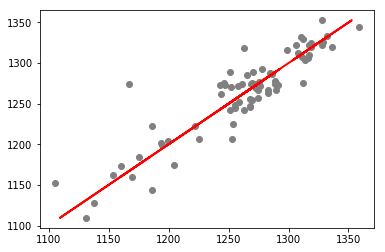

In [0]:
get_plot(y_pred_ridge)

#          Gradient Boosting Trees

In [0]:
# Model #2 -  Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [0]:
get_performance(y_pred_gb)

Mean Absolute Error: 21.2955
Mean Squared Error: 791.2589
Root Mean Squared Error: 28.1293


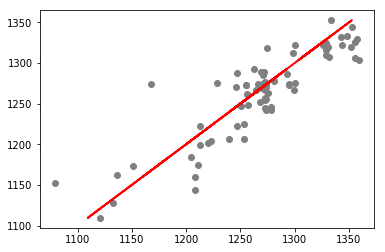

In [0]:
get_plot(y_pred_gb)

# Comparison

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag),
                     "lr":np.absolute(y_test-y_pred_lr),
                     "ridge":np.absolute(y_test-y_pred_ridge),
                     "gb":np.absolute(y_test-y_pred_gb)})

(5, 20)

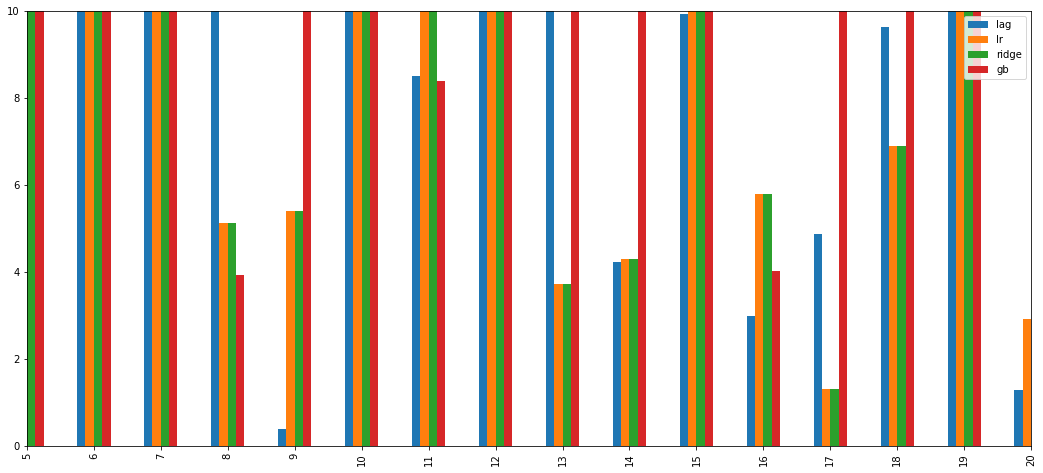

In [0]:
df_comp.plot.bar(figsize=(18,8))
plt.ylim(0,10)
plt.xlim(5,20)

# Conclusion 

I have used Reliance Industries Ltd to perform the following stock prediction using Regression models